In [22]:
import pandas as pd
import numpy as np
from config import *
import seaborn as sns
import matplotlib.pyplot as plt
from modules.transformations import *

In [23]:
print(YEARS)

NameError: name 'YEARS' is not defined

In [3]:
df = pd.read_csv(DATA_FILE_PATH)
dictionary = pd.read_csv(DICTIONARY_PATH)
dictionary.columns = ["country_name", "state_name", "sovereign" ,"country_code_2", "country_code_3", "numeric_code", "subdivision", "internet_domain"]
name_mapping = dictionary[["country_name", "country_code_3"]]

The first step for my is getting this data into a format that's more easily digestible.
The formatting is initally as an incredibly sparse matrix, but I'm more interested in representing the data as a series of vectors.

In [4]:
df.rename(
    columns = COLUMN_MAPPINGS,
    inplace= True
)

df.set_index('source', inplace=True)

In [5]:
usa_subset = df.loc["USA"]
usa_subset.index

Index(['ABW', 'AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT',
       ...
       'VCT', 'VEN', 'VIR', 'VNM', 'VUT', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=200)

The data is transformed to a vector for more compact storage. This also mimics the format of data streams in which much data flows in industrial applications.

In [6]:
data = matrix_to_vectors(df)
data

array([['ABW', 'ABW', 0],
       ['ABW', 'AFG', 0],
       ['ABW', 'AGO', 0],
       ...,
       ['ZWE', 'ZAF', 276684],
       ['ZWE', 'ZMB', 5573],
       ['ZWE', 'ZWE', 0]], shape=(40000, 3), dtype=object)

In [28]:
dictionary.columns = ["country_name", "state_name", "sovereign" ,"country_code_2", "country_code_3", "numeric_code", "subdivision", "internet_domain"]
dictionary

,country_name,state_name,sovereign,country_code_2,country_code_3,numeric_code,subdivision,internet_domain
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,.mw-parser-output .monospaced{font-family:mono...,AFG,4,ISO 3166-2:AF,.af
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax
2,Albania,The Republic of Albania,UN member state,AL,ALB,8,ISO 3166-2:AL,.al
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,12,ISO 3166-2:DZ,.dz
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,16,ISO 3166-2:AS,.as
...,...,...,...,...,...,...,...,...
243,Wallis and Futuna,The Territory of the Wallis and Futuna Islands,France,WF,WLF,876,ISO 3166-2:WF,.wf
244,Western Sahara [ah],The Sahrawi Arab Democratic Republic,Disputed [ai],EH,ESH,732,ISO 3166-2:EH,[aj]
245,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye
246,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm


In [48]:
usa_subset = df.loc["USA"] # isolate data from the US
usa_subset = pd.merge(
    usa_subset,
    dictionary,
    how = "inner",
    right_on = "country_code_3",
    left_index = True
) # merge the country names
usa_subset = usa_subset[["USA", "country_name"]]
usa_subset.columns = ["alpha", "origin"]
usa_subset

,alpha,origin
12,577,Aruba
0,3272,Afghanistan
6,483,Angola
2,2959,Albania
232,1571,United Arab Emirates (the)
...,...,...
191,1120,Samoa
245,1167,Yemen
205,8238,South Africa
246,469,Zambia


/home/codespace/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


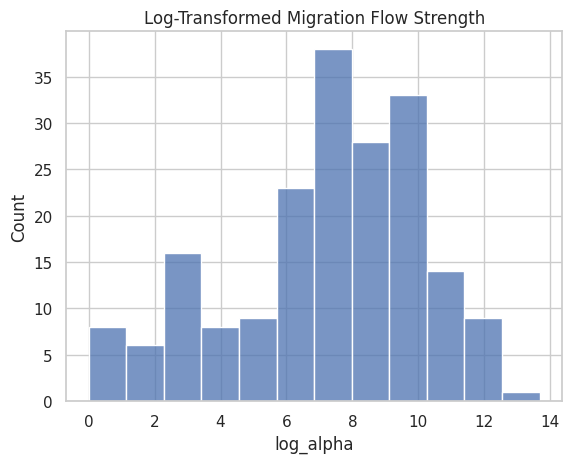

In [55]:
# do a log transformation of the data
usa_subset["log_alpha"] = np.log(usa_subset["alpha"])
sns.histplot(usa_subset["log_alpha"])
plt.title("Log-Transformed Migration Flow Strength")
plt.show()

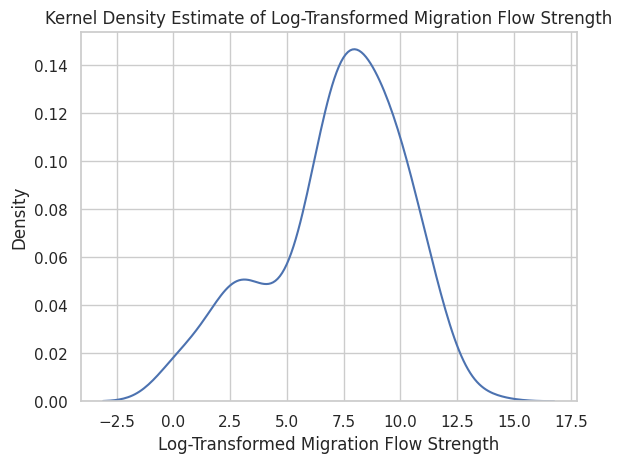

In [58]:
# fit a KDE to the histogram
sns.kdeplot(usa_subset["log_alpha"])
plt.title("Kernel Density Estimate of Log-Transformed Migration Flow Strength")
plt.xlabel("Log-Transformed Migration Flow Strength")
plt.ylabel("Density")
plt.show()

In [61]:
# sort usa_subset by descending alpha
usa_subset.sort_values(by = "alpha", ascending = False, inplace = True)
usa_subset

,alpha,origin,log_alpha
143,869981,Mexico,13.676227
178,163557,Puerto Rico,12.004917
45,136916,China,11.827123
40,132644,Canada,11.795424
174,128141,Philippines (the),11.760886
...,...,...,...
244,0,Western Sahara [ah],-inf
57,0,Curaçao,-inf
148,0,Montenegro,-inf
207,0,South Sudan,-inf


In [16]:
import networkx as nx

G = nx.DiGraph()

for i in range(usa_subset.shape[0]):
    if usa_subset.iloc[i] != 0:
        G.add_edge(
            "USA",
            usa_subset.index[i],
            weight = usa_subset.iloc[i]
        )


Visualizing the United States inbound migration traffic gives us an egocentric network. We essentially have a one-hop network of connected nodes.



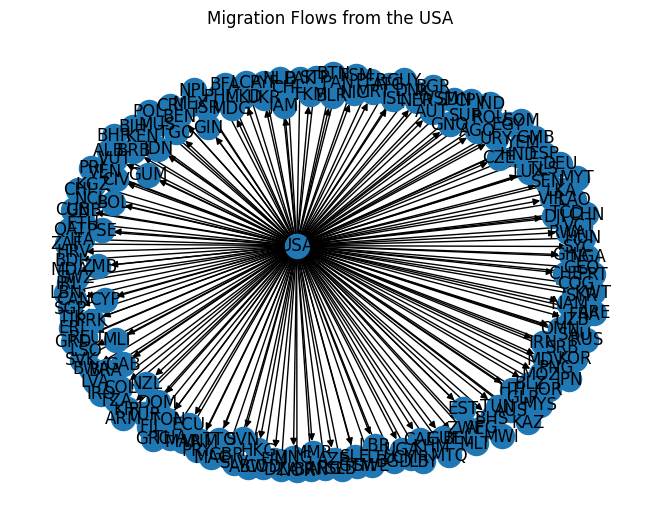

In [17]:
# draw the network
nx.draw(G, with_labels = True)
plt.title("Migration Flows from the USA")
plt.show()